In [1]:
#|default_exp app

#Musical Instrument Recognizer

In [1]:
!pip install -Uqq fastai fastbook nbdev gradio

ERROR: Some build dependencies for cymem==2.0.2 from https://files.pythonhosted.org/packages/8b/dc/0976e04cc46f86e0dd3ee3797ec68057eaafebf31daca9a076dc138b9920/cymem-2.0.2.tar.gz (from fastai) conflict with the backend dependencies: wheel==0.42.0 is incompatible with wheel>=0.32.0,<0.33.0.


In [1]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

ModuleNotFoundError: No module named 'fastai'

In [16]:
#!export
model = load_learner(f"models/musical-instrument-recognizer-v6.pkl")

In [17]:
#|export
musical_instruments = (
    'Bansuri',
    'Harmonium',
    'Pakhawaz',
    'Santoor',
    'Sarangi',
    'Sarod',
    'Shehnai',
    'Sitar',
    'Tabla',
    'Tanpura'
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(musical_instruments, map(float, probs)))

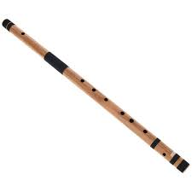

In [18]:
from PIL import Image
img = Image.open(f'test_data/bansuri.jfif')
img.thumbnail((192,192))
img

In [19]:
recognize_image(img)

{'Bansuri': 0.9995973706245422,
 'Harmonium': 3.5202569961256813e-06,
 'Pakhawaz': 2.915377308454481e-06,
 'Santoor': 2.1727865373577515e-07,
 'Sarangi': 4.1493856883789704e-07,
 'Sarod': 1.0827788088363377e-07,
 'Shehnai': 0.0003836842952296138,
 'Sitar': 9.002708793559577e-06,
 'Tabla': 2.717604274948826e-06,
 'Tanpura': 1.3091357686789706e-07}

In [20]:
#!export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = [
    'test_data/bansuri.jfif',
    'test_data/harmonium.jfif',
    'test_data/pakhawaj.jfif',
    'test_data/santoor.jfif',
    'test_data/sarengi.jfif',
    'test_data/sarod.jfif',
    'test_data/shehnai.jfif',
    'test_data/sitar.jfif',
    'test_data/tabla.jfif',
    'test_data/tanpura.jfif'
]

iface = gr.Interface(fn=recognize_image, inputs = image, outputs= label, examples = examples)
iface.launch(inline =False, share = True)

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:256: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:196: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


IMPORTANT: You are using gradio version 3.13.0, however version 3.14.0 is available, please upgrade.
--------
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()

Setting up a public link... we have recently upgraded the way public links are generated. If you encounter any problems, please report the issue and downgrade to gradio version 3.13.0
.
Running on public URL: https://9fc74c01-6bc9-4897.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces


# Notebook to Python Script Export

In [22]:
# from nbdev.export import notebook2script
# notebook2script('app.ipynb')